In [1]:
from datetime import datetime
from concurrent import futures

import pandas as pd
from pandas import DataFrame
!pip install pandas-datareader
import pandas_datareader.data as web

In [2]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^IXIC']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.
df = pd.read_csv('^IXIC_data.csv')


^IXIC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df=df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Name'])

In [5]:
df

,Close
Date,
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
2016-08-17,5228.660156
...,...
2021-08-05,14895.120117
2021-08-06,14835.759766
2021-08-09,14860.179688


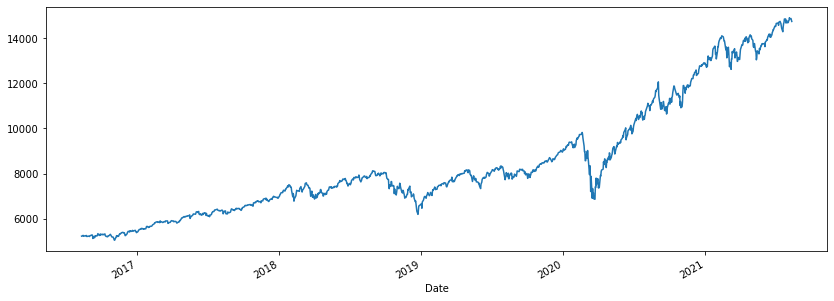

In [6]:
df['Close'].plot(figsize = (14,5));

In [7]:
IXIC = df

In [8]:
IXIC

,Close
Date,
2016-08-11,5228.399902
2016-08-12,5232.890137
2016-08-15,5262.020020
2016-08-16,5227.109863
2016-08-17,5228.660156
...,...
2021-08-05,14895.120117
2021-08-06,14835.759766
2021-08-09,14860.179688


In [9]:
IXIC.describe()

,Close
count,1259.000000
mean,8456.594272
std,2590.934421
min,5046.370117
25%,6651.385010
50%,7750.839844
75%,9491.300293
max,14895.120117


In [10]:
cutoff = round(IXIC.shape[0]*0.9)

In [11]:
cutoff

1133

In [12]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import itertools
#from pmdarima import auto_arima

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


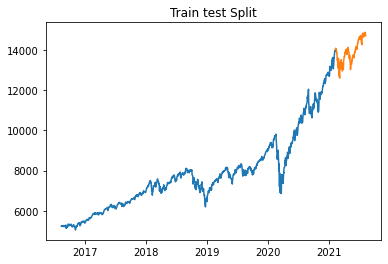

In [13]:
train = IXIC[:cutoff]
test = IXIC[cutoff:]

fig, ax = plt.subplots()
ax.plot(train)
ax.plot(test)
ax.set_title('Train test Split');

In [14]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^GSPC']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.
GSPC = pd.read_csv('^GSPC_data.csv')
GSPC

^GSPC
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,2188.449951,2177.969971,2177.969971,2185.790039,3423160000,2185.790039,^GSPC
1,2016-08-12,2186.280029,2179.419922,2183.739990,2184.050049,3000660000,2184.050049,^GSPC
2,2016-08-15,2193.810059,2186.080078,2186.080078,2190.149902,3078530000,2190.149902,^GSPC
3,2016-08-16,2186.239990,2178.139893,2186.239990,2178.149902,3196400000,2178.149902,^GSPC
4,2016-08-17,2183.080078,2168.500000,2177.840088,2182.219971,3388910000,2182.219971,^GSPC
...,...,...,...,...,...,...,...,...
1254,2021-08-05,4429.759766,4408.859863,4408.859863,4429.100098,2734220000,4429.100098,^GSPC
1255,2021-08-06,4440.819824,4429.069824,4429.069824,4436.520020,2839970000,4436.520020,^GSPC
1256,2021-08-09,4439.390137,4424.740234,4437.770020,4432.350098,2779880000,4432.350098,^GSPC
1257,2021-08-10,4445.209961,4430.029785,4435.790039,4436.750000,3219840000,4436.750000,^GSPC


In [15]:
from sklearn.pipeline import Pipeline

In [16]:
def clean(df, train_size):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df=df.drop(columns=['High', 'Low', 'Open', 'Volume', 'Adj Close', 'Name'])
    cutoff = round(df.shape[0]*train_size)
    train = df[:cutoff]
    test = df[cutoff:]
    return train, test

In [17]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^DJI']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


^DJI
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [18]:
DJI = pd.read_csv('^DJI_data.csv')


In [19]:
DJI_train, DJI_test = clean(DJI, .9)

In [20]:
DJI_train

,Close
Date,
2016-08-11,18613.519531
2016-08-12,18576.470703
2016-08-15,18636.050781
2016-08-16,18552.019531
2016-08-17,18573.939453
...,...
2021-02-04,31055.859375
2021-02-05,31148.240234
2021-02-08,31385.759766


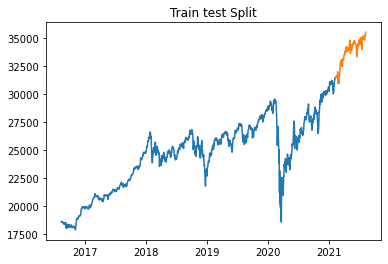

In [21]:
fig, ax = plt.subplots()
ax.plot(DJI_train)
ax.plot(DJI_test)
ax.set_title('Train test Split');

In [22]:
#!pip install --upgrade tensorflow
#import tensorflow as tf 
#from tensorflow import keras
#from tensorflow.keras import models
#from tensorflow.keras import layers
#from tensorflow.keras import optimizers
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, LSTM

In [23]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['GC=F']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


GC=F
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [24]:
Gold = pd.read_csv('GC=F_data.csv')


In [25]:
!pip install pystan==2.19.1.1
!pip install prophet
from prophet import Prophet as proph

In [26]:
Model = proph()

In [27]:
Gold.reset_index(inplace=True)

In [28]:
Gold['ds']=Gold['Date']

In [29]:
Gold['y']=Gold['Close']

In [30]:
Gold.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [31]:

Gold.drop('index',axis=1)

,ds,y
0,2016-08-11,1342.500000
1,2016-08-12,1335.800049
2,2016-08-15,1340.300049
3,2016-08-16,1350.500000
4,2016-08-17,1342.699951
...,...,...
1241,2021-08-05,1805.099976
1242,2021-08-06,1760.000000
1243,2021-08-09,1723.400024
1244,2021-08-10,1728.800049


In [32]:
cutoff=round(Gold.shape[0]*0.9)

In [33]:
Gold_train = Gold[:cutoff]
Gold_test = Gold[cutoff:]

In [34]:
Model.fit(Gold_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
train_preds=Model.predict(Gold_train)
test_preds=Model.predict(Gold_test)


In [36]:
train_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-11,1234.396158,1311.252775,1374.727555,1234.396158,1234.396158,107.723661,107.723661,107.723661,-19.563867,-19.563867,-19.563867,127.287529,127.287529,127.287529,0.0,0.0,0.0,1342.119819
1,2016-08-12,1234.718622,1311.066831,1376.491610,1234.718622,1234.718622,107.609281,107.609281,107.609281,-19.883402,-19.883402,-19.883402,127.492683,127.492683,127.492683,0.0,0.0,0.0,1342.327903
2,2016-08-15,1235.686014,1312.912142,1377.312333,1235.686014,1235.686014,107.788316,107.788316,107.788316,-18.890737,-18.890737,-18.890737,126.679053,126.679053,126.679053,0.0,0.0,0.0,1343.474331
3,2016-08-16,1236.008478,1310.640451,1374.735784,1236.008478,1236.008478,106.655722,106.655722,106.655722,-19.366765,-19.366765,-19.366765,126.022487,126.022487,126.022487,0.0,0.0,0.0,1342.664201
4,2016-08-17,1236.330943,1312.042396,1376.232698,1236.330943,1236.330943,105.202356,105.202356,105.202356,-20.019936,-20.019936,-20.019936,125.222292,125.222292,125.222292,0.0,0.0,0.0,1341.533299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,2021-02-05,1977.596196,1853.533297,1917.485366,1977.596196,1977.596196,-93.027245,-93.027245,-93.027245,-19.883402,-19.883402,-19.883402,-73.143844,-73.143844,-73.143844,0.0,0.0,0.0,1884.568950
1117,2021-02-08,1980.193494,1862.786326,1925.904434,1980.193494,1980.193494,-86.653716,-86.653716,-86.653716,-18.890737,-18.890737,-18.890737,-67.762979,-67.762979,-67.762979,0.0,0.0,0.0,1893.539778
1118,2021-02-09,1981.059260,1864.270325,1927.830093,1981.059260,1981.059260,-85.021542,-85.021542,-85.021542,-19.366765,-19.366765,-19.366765,-65.654777,-65.654777,-65.654777,0.0,0.0,0.0,1896.037718
1119,2021-02-10,1981.925025,1865.388934,1929.093664,1981.925025,1981.925025,-83.458051,-83.458051,-83.458051,-20.019936,-20.019936,-20.019936,-63.438115,-63.438115,-63.438115,0.0,0.0,0.0,1898.466974


In [37]:
test_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-12,1983.656557,1874.059674,1937.467805,1983.656557,1983.656557,-78.698879,-78.698879,-78.698879,-19.883402,-19.883402,-19.883402,-58.815477,-58.815477,-58.815477,0.0,0.0,0.0,1904.957678
1,2021-02-16,1987.119621,1885.877008,1950.007181,1987.119621,1987.119621,-69.211577,-69.211577,-69.211577,-19.366765,-19.366765,-19.366765,-49.844813,-49.844813,-49.844813,0.0,0.0,0.0,1917.908044
2,2021-02-17,1987.985387,1888.833912,1953.337984,1987.985387,1987.985387,-67.896921,-67.896921,-67.896921,-20.019936,-20.019936,-20.019936,-47.876985,-47.876985,-47.876985,0.0,0.0,0.0,1920.088466
3,2021-02-18,1988.851153,1892.865203,1955.314227,1988.851153,1988.851153,-65.653502,-65.653502,-65.653502,-19.563867,-19.563867,-19.563867,-46.089634,-46.089634,-46.089634,0.0,0.0,0.0,1923.197652
4,2021-02-19,1989.716919,1893.778580,1956.746471,1989.716919,1989.716919,-64.397476,-64.397476,-64.397476,-19.883402,-19.883402,-19.883402,-44.514075,-44.514075,-44.514075,0.0,0.0,0.0,1925.319443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021-08-05,2134.299837,2034.186823,2413.582022,1946.985664,2303.164485,99.596214,99.596214,99.596214,-19.563867,-19.563867,-19.563867,119.160082,119.160082,119.160082,0.0,0.0,0.0,2233.896051
121,2021-08-06,2135.165603,2045.422409,2410.957540,1947.776322,2305.198965,101.419626,101.419626,101.419626,-19.883402,-19.883402,-19.883402,121.303028,121.303028,121.303028,0.0,0.0,0.0,2236.585229
122,2021-08-09,2137.762901,2042.097920,2424.973603,1945.689010,2312.573200,106.891980,106.891980,106.891980,-18.890737,-18.890737,-18.890737,125.782716,125.782716,125.782716,0.0,0.0,0.0,2244.654880
123,2021-08-10,2138.628667,2042.620651,2428.890735,1945.121971,2314.792558,107.271604,107.271604,107.271604,-19.366765,-19.366765,-19.366765,126.638368,126.638368,126.638368,0.0,0.0,0.0,2245.900271


In [38]:
Gold_test

,index,ds,y
1121,1121,2021-02-12,1821.599976
1122,1122,2021-02-16,1797.199951
1123,1123,2021-02-17,1771.099976
1124,1124,2021-02-18,1773.400024
1125,1125,2021-02-19,1775.800049
...,...,...,...
1241,1241,2021-08-05,1805.099976
1242,1242,2021-08-06,1760.000000
1243,1243,2021-08-09,1723.400024
1244,1244,2021-08-10,1728.800049


In [39]:
from prophet.diagnostics import cross_validation


In [40]:
Gold_cv = cross_validation(Model, horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2019-08-13 12:00:00 and 2020-02-12 00:00:00


In [41]:
Gold_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-08-14,1487.040655,1467.440240,1505.668150,1515.900024,2019-08-13 12:00:00
1,2019-08-15,1488.965597,1470.458949,1507.286447,1519.599976,2019-08-13 12:00:00
2,2019-08-16,1491.661711,1471.678572,1511.866284,1512.500000,2019-08-13 12:00:00
3,2019-08-19,1497.746587,1478.647886,1517.083391,1500.400024,2019-08-13 12:00:00
4,2019-08-20,1499.100829,1480.584211,1517.693438,1504.599976,2019-08-13 12:00:00
...,...,...,...,...,...,...
495,2021-02-05,1967.998617,1370.827111,2611.912601,1810.900024,2020-02-12 00:00:00
496,2021-02-08,1974.351808,1376.079153,2625.169312,1831.900024,2020-02-12 00:00:00
497,2021-02-09,1975.805794,1367.454012,2636.499865,1835.300049,2020-02-12 00:00:00
498,2021-02-10,1978.560730,1368.147403,2637.514108,1840.599976,2020-02-12 00:00:00


In [42]:
testnoind=Gold_test.reset_index()

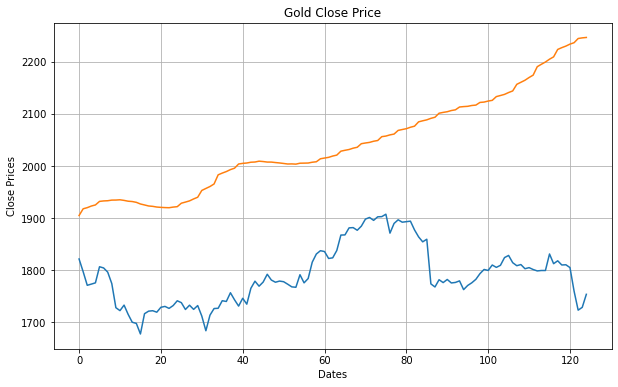

In [43]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(testnoind['y'])
plt.plot(test_preds['yhat'])
plt.title('Gold Close Price')
plt.show()

In [44]:
DJI

,High,Low,Open,Close,Volume,Adj Close,Name
Date,,,,,,,
2016-08-11,18638.339844,18519.080078,18519.080078,18613.519531,71470000,18613.519531,^DJI
2016-08-12,18606.060547,18535.859375,18595.650391,18576.470703,61580000,18576.470703,^DJI
2016-08-15,18722.609375,18559.929688,18588.589844,18636.050781,62350000,18636.050781,^DJI
2016-08-16,18614.859375,18550.650391,18614.480469,18552.019531,67570000,18552.019531,^DJI
2016-08-17,18582.349609,18468.679688,18537.089844,18573.939453,71000000,18573.939453,^DJI
...,...,...,...,...,...,...,...
2021-08-05,35067.539062,34815.609375,34815.609375,35064.250000,216580000,35064.250000,^DJI
2021-08-06,35246.789062,35077.441406,35077.441406,35208.511719,231570000,35208.511719,^DJI
2021-08-09,35229.671875,35041.238281,35229.671875,35101.851562,207850000,35101.851562,^DJI


In [45]:
GSPC_proph= GSPC
GSPC_proph['ds']=GSPC_proph['Date']
GSPC_proph['y']=GSPC_proph['Close']
GSPC_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [46]:
GSPC_proph

,ds,y
0,2016-08-11,2185.790039
1,2016-08-12,2184.050049
2,2016-08-15,2190.149902
3,2016-08-16,2178.149902
4,2016-08-17,2182.219971
...,...,...
1254,2021-08-05,4429.100098
1255,2021-08-06,4436.520020
1256,2021-08-09,4432.350098
1257,2021-08-10,4436.750000


In [47]:
Model1 = proph(daily_seasonality=True)

In [48]:
GSPC_train = GSPC_proph[:cutoff]
GSPC_test = GSPC_proph[cutoff:]

In [49]:
GSPC_test

,ds,y
1121,2021-01-26,3849.620117
1122,2021-01-27,3750.770020
1123,2021-01-28,3787.379883
1124,2021-01-29,3714.239990
1125,2021-02-01,3773.860107
...,...,...
1254,2021-08-05,4429.100098
1255,2021-08-06,4436.520020
1256,2021-08-09,4432.350098
1257,2021-08-10,4436.750000


In [50]:
Model1.fit(GSPC_train)

In [51]:
GSPC_train_preds=Model1.predict(GSPC_train)
GSPC_test_preds=Model1.predict(GSPC_test)
testnoind2=GSPC_test.reset_index()

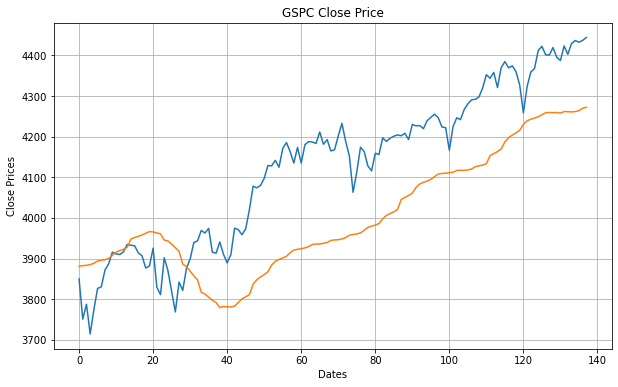

In [52]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(testnoind2['y'])
plt.plot(GSPC_test_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [53]:
import itertools
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import performance_metrics

In [54]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(GSPC_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31826db0d0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f3182786a90>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31826db040>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31826db7c0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

KeyboardInterrupt: 

In [55]:
Model2= proph(daily_seasonality=True,holidays_prior_scale = 0.1)

In [56]:
Model2.fit(GSPC_train)

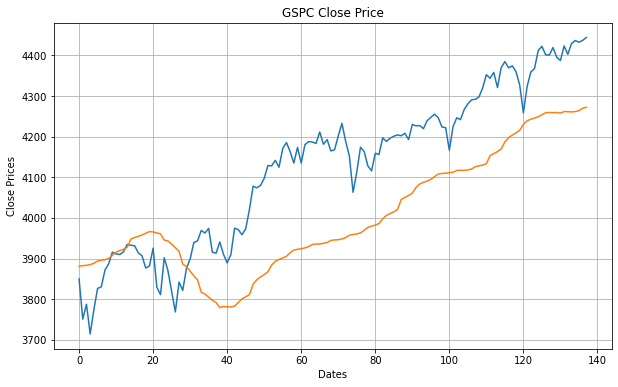

In [57]:
GSPC_train2_preds=Model2.predict(GSPC_train)
GSPC_test2_preds=Model2.predict(GSPC_test)
testnoind3=GSPC_test.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test2_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [58]:
GSPC_test2_preds[:30]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-26,3766.575312,3781.164375,3980.434566,3766.575312,3766.575312,114.212447,114.212447,114.212447,-19.266162,...,0.491410,0.491410,0.491410,132.987200,132.987200,132.987200,0.0,0.0,0.0,3880.787759
1,2021-01-27,3769.335167,3787.009374,3980.652518,3769.335167,3769.335167,113.063169,113.063169,113.063169,-19.266162,...,0.026604,0.026604,0.026604,132.302728,132.302728,132.302728,0.0,0.0,0.0,3882.398337
2,2021-01-28,3772.095023,3784.058360,3982.984570,3772.095023,3772.095023,111.108546,111.108546,111.108546,-19.266162,...,-1.056477,-1.056477,-1.056477,131.431185,131.431185,131.431185,0.0,0.0,0.0,3883.203569
3,2021-01-29,3774.854878,3777.060925,3984.912261,3774.854878,3774.854878,110.162055,110.162055,110.162055,-19.266162,...,-1.015331,-1.015331,-1.015331,130.443548,130.443548,130.443548,0.0,0.0,0.0,3885.016933
4,2021-02-01,3783.134445,3783.117269,3988.153817,3783.134445,3783.134445,104.967406,104.967406,104.967406,-19.266162,...,-3.262742,-3.262742,-3.262742,127.496310,127.496310,127.496310,0.0,0.0,0.0,3888.101851
5,2021-02-02,3785.894301,3794.123545,3991.703012,3785.894301,3785.894301,107.967684,107.967684,107.967684,-19.266162,...,0.491410,0.491410,0.491410,126.742437,126.742437,126.742437,0.0,0.0,0.0,3893.861985
6,2021-02-03,3788.654156,3788.352960,3993.421428,3788.654156,3788.654156,106.960611,106.960611,106.960611,-19.266162,...,0.026604,0.026604,0.026604,126.200169,126.200169,126.200169,0.0,0.0,0.0,3895.614767
7,2021-02-04,3791.414012,3797.840846,3993.652683,3791.414012,3791.414012,105.592637,105.592637,105.592637,-19.266162,...,-1.056477,-1.056477,-1.056477,125.915276,125.915276,125.915276,0.0,0.0,0.0,3897.006649
8,2021-02-05,3794.173868,3798.498692,3997.006946,3794.173868,3794.173868,105.641259,105.641259,105.641259,-19.266162,...,-1.015331,-1.015331,-1.015331,125.922753,125.922753,125.922753,0.0,0.0,0.0,3899.815127
9,2021-02-08,3802.453434,3810.930811,4008.828883,3802.129484,3802.453434,105.332620,105.332620,105.332620,-19.266162,...,-3.262742,-3.262742,-3.262742,127.861525,127.861525,127.861525,0.0,0.0,0.0,3907.786054


In [59]:
GSPC = pd.read_csv('^GSPC_data.csv')

In [60]:
GSPC

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,2188.449951,2177.969971,2177.969971,2185.790039,3423160000,2185.790039,^GSPC
1,2016-08-12,2186.280029,2179.419922,2183.739990,2184.050049,3000660000,2184.050049,^GSPC
2,2016-08-15,2193.810059,2186.080078,2186.080078,2190.149902,3078530000,2190.149902,^GSPC
3,2016-08-16,2186.239990,2178.139893,2186.239990,2178.149902,3196400000,2178.149902,^GSPC
4,2016-08-17,2183.080078,2168.500000,2177.840088,2182.219971,3388910000,2182.219971,^GSPC
...,...,...,...,...,...,...,...,...
1254,2021-08-05,4429.759766,4408.859863,4408.859863,4429.100098,2734220000,4429.100098,^GSPC
1255,2021-08-06,4440.819824,4429.069824,4429.069824,4436.520020,2839970000,4436.520020,^GSPC
1256,2021-08-09,4439.390137,4424.740234,4437.770020,4432.350098,2779880000,4432.350098,^GSPC
1257,2021-08-10,4445.209961,4430.029785,4435.790039,4436.750000,3219840000,4436.750000,^GSPC


In [61]:
GSPC_train = GSPC[cutoff:]
GSPC_test = GSPC[:cutoff]

In [62]:
tr=GSPC_train['Close'].diff(periods=3)
te=GSPC_test['Close'].diff(periods=3)

In [63]:
GSPC_train['Close']=tr
GSPC_test['Close']=te

<ipython-input-63-0978b1cda969>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_train['Close']=tr
<ipython-input-63-0978b1cda969>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_test['Close']=te


In [64]:
GSPC_train.dropna(inplace=True)
GSPC_test.dropna(inplace=True)

<ipython-input-64-9329784c62aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_train.dropna(inplace=True)
<ipython-input-64-9329784c62aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GSPC_test.dropna(inplace=True)


In [65]:
GSPC_trainss = GSPC_train['Close'].values
GSPC_testss=GSPC_test['Close'].values

In [66]:
GSPC_trainss=GSPC_trainss.reshape(-1,1)
GSPC_testss=GSPC_testss.reshape(-1,1)

In [67]:
GSPC.shape

(1259, 8)

In [68]:
cutoff= round(GSPC.shape[0]*0.9)

In [69]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [70]:
GSPC_x_train, GSPC_y_train = create_dataset(GSPC_trainss)
GSPC_x_test, GSPC_y_test = create_dataset(GSPC_testss)

In [71]:
GSPC_x_train = np.reshape(GSPC_x_train, (GSPC_x_train.shape[0], GSPC_x_train.shape[1], 1))
GSPC_x_test = np.reshape(GSPC_x_test, (GSPC_x_test.shape[0], GSPC_x_test.shape[1], 1))

In [72]:

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [73]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(GSPC_x_train.shape[1], 1)))

model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [74]:
GSPC_x_train = np.reshape(GSPC_x_train, (GSPC_x_train.shape[0], GSPC_x_train.shape[1], 1))
GSPC_x_test = np.reshape(GSPC_x_test, (GSPC_x_test.shape[0], GSPC_x_test.shape[1], 1))

In [75]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [76]:
GSPC_x_train.shape

(85, 50, 1)

In [77]:
%config Completer.use_jedi = False

In [78]:
history = model.fit(GSPC_x_train, GSPC_y_train, epochs=250, batch_size=85)

Epoch 1/250
1/1 [==============================] - 0s 1ms/step - loss: 1973.1323
Epoch 2/250
1/1 [==============================] - 0s 998us/step - loss: 1966.6820
Epoch 3/250
1/1 [==============================] - 0s 1ms/step - loss: 1959.3809
Epoch 4/250
1/1 [==============================] - 0s 891us/step - loss: 1949.8197
Epoch 5/250
1/1 [==============================] - 0s 1ms/step - loss: 1935.1865
Epoch 6/250
1/1 [==============================] - 0s 923us/step - loss: 1904.0646
Epoch 7/250
1/1 [==============================] - 0s 949us/step - loss: 1834.5917
Epoch 8/250
1/1 [==============================] - 0s 931us/step - loss: 3103.0967
Epoch 9/250
1/1 [==============================] - 0s 992us/step - loss: 1777.7034
Epoch 10/250
1/1 [==============================] - 0s 1ms/step - loss: 1816.2163
Epoch 11/250
1/1 [==============================] - 0s 1ms/step - loss: 1837.8536
Epoch 12/250
1/1 [==============================] - 0s 1ms/step - loss: 1858.0192
Epoch 13/250


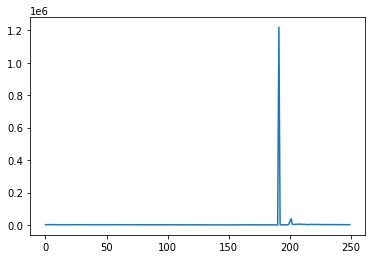

In [79]:
loss = history.history['loss']

plt.plot(range(len(loss)), loss)

In [80]:
np.ravel(model.predict(GSPC_x_test).reshape(-1,1))

array([ 0.15542221, -4.476368  , -1.0236509 , ...,  8.675826  ,
       -2.1141052 , 23.366833  ], dtype=float32)

In [83]:
GSPC_y_train

array([  44.41992188,   -4.13964844,   42.4296875 ,   43.88037109,
         38.59960938,  -35.47998047,  -12.05029297,  -28.27978516,
         45.22998047,   14.20019531,   51.74023438,    3.01025391,
         23.85009766,   -5.55029297,    9.47998047,  -46.81005859,
        -13.58007812,    8.95996094,   67.93994141,   20.84033203,
        -49.52001953, -169.56005859,  -75.93017578,   21.75      ,
        100.25      ,   15.33007812,  -58.16992188,   -4.16992188,
         28.02978516,   81.36962891,   29.00976562,   40.13037109,
          3.83007812,   15.97998047,    6.04980469,    7.24023438,
        -11.25976562,   27.85009766,   18.39990234,   34.40966797,
        -10.34033203,   12.66015625,   20.18017578,   35.60009766,
          7.40966797,  -23.73974609,  -33.29003906,  -80.13964844,
          1.08984375,   24.58007812,   75.38964844,   41.70019531,
         34.26025391,   48.77001953,   25.30957031,   16.79980469,
         29.33007812,   60.54003906,   46.04003906,   38.18994

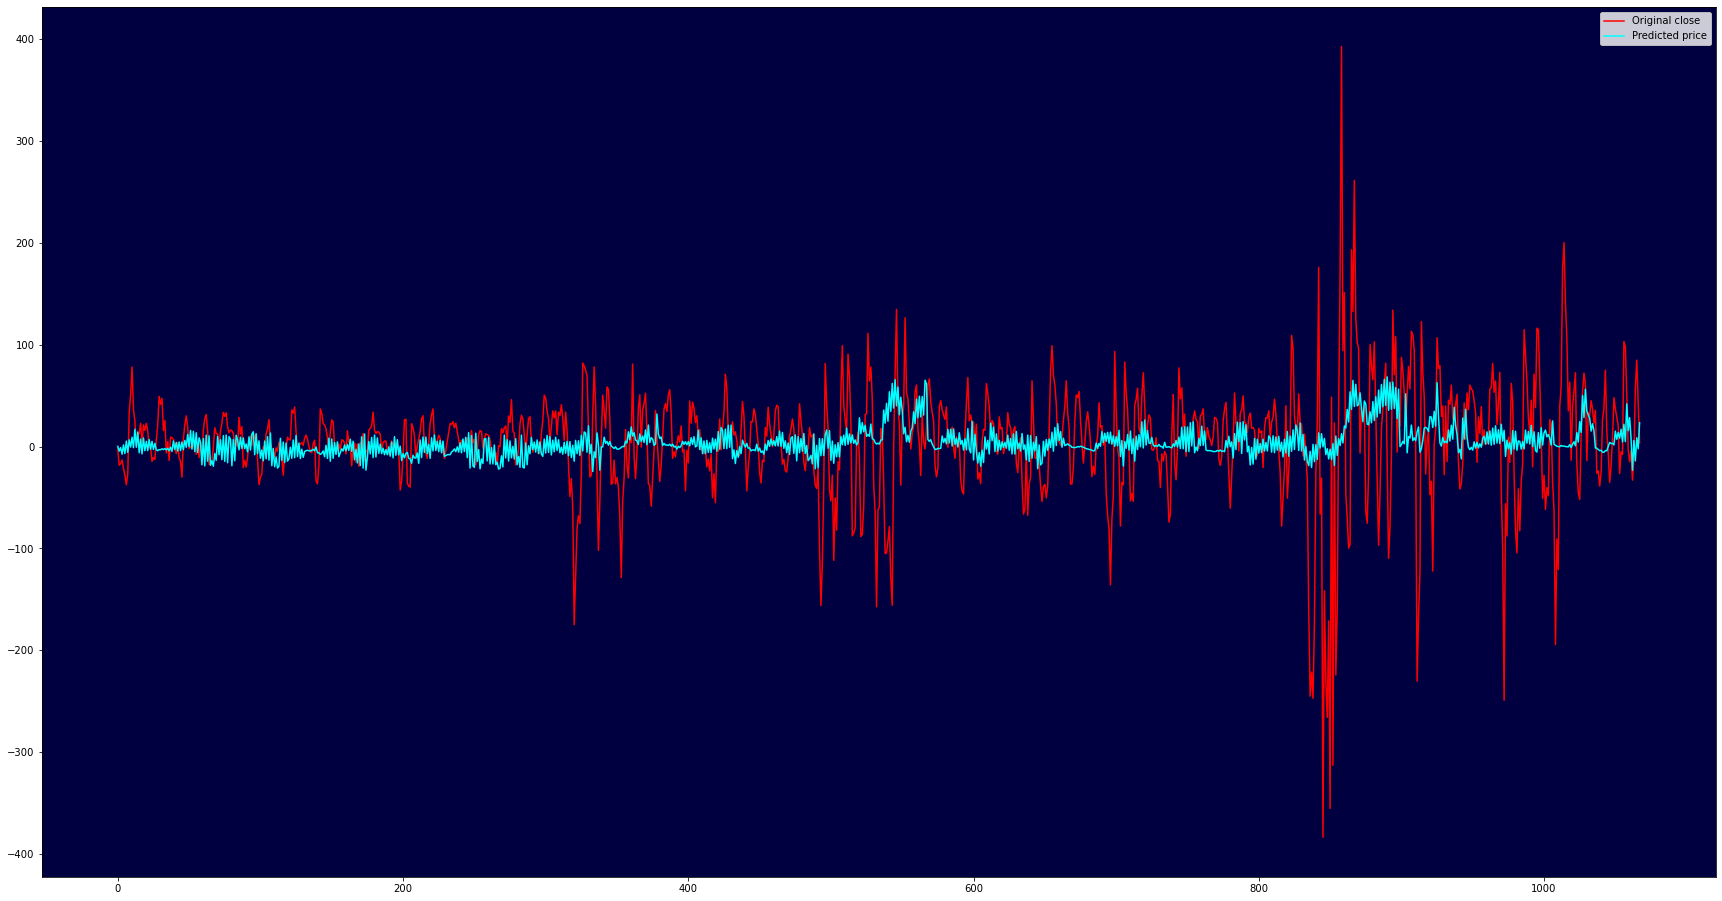

In [86]:
predictions = np.ravel(model.predict(GSPC_x_test).reshape(-1,1))
GSPC_y_test_scaled = GSPC_y_test.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(30,16))
ax.set_facecolor('#000041')
ax.plot(GSPC_y_test_scaled, color='red', label='Original close')
ax.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [131]:
predictions

array([ 0.15542221, -4.476368  , -1.0236509 , ...,  8.675826  ,
       -2.1141052 , 23.366833  ], dtype=float32)

In [87]:
GSPC_y_test_scaled

array([[ -1.72998047],
       [-18.29003906],
       [-16.75      ],
       ...,
       [ 84.82006836],
       [ 42.56005859],
       [  3.51000977]])

In [88]:
Model3 = proph(holidays_prior_scale = 0.1)
Model3.add_seasonality(name='week', period=5, fourier_order=4)

In [89]:

GSPC_train3 = GSPC_proph[:cutoff]
GSPC_test3 = GSPC_proph[cutoff:]

In [90]:
Model3.fit(GSPC_train3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [91]:
GSPC_train3_preds=Model3.predict(GSPC_train3)
GSPC_test3_preds=Model3.predict(GSPC_test3)
testnoind3=GSPC_test.reset_index()

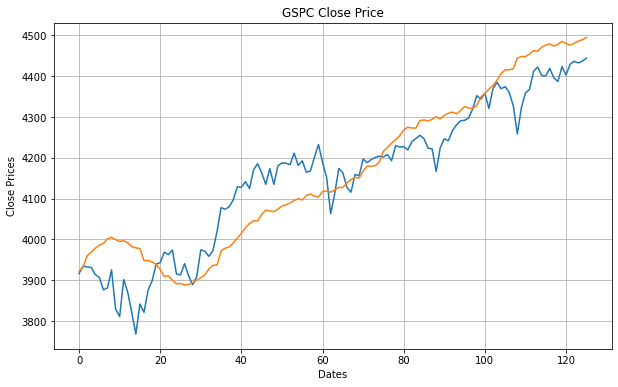

In [92]:

testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test3_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [93]:
import pandas as pd
from datetime import datetime
import numpy as np
date_rng = pd.date_range(start='2021/08/10', end='2021/09/10', freq='B')

In [94]:
future = pd.DataFrame(date_rng, columns=['y'])
future['y'] = np.random.randint(0,100,size=(len(date_rng)))
future['ds'] = date_rng

In [95]:
future

,y,ds
0,98,2021-08-10
1,15,2021-08-11
2,11,2021-08-12
3,47,2021-08-13
4,83,2021-08-16
5,9,2021-08-17
6,56,2021-08-18
7,37,2021-08-19
8,58,2021-08-20
9,75,2021-08-23


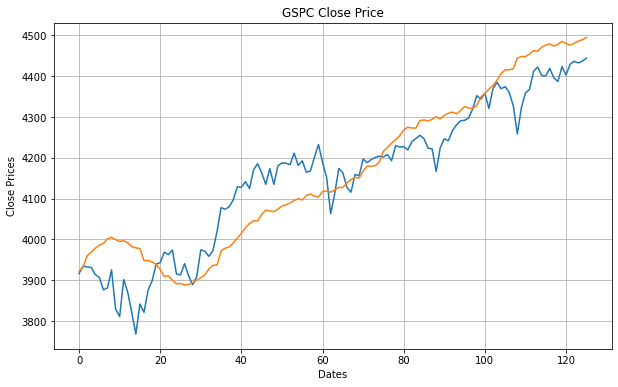

In [96]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind3['y'])
plt.plot(GSPC_test3_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [97]:
#forecast = Model3.predict(future)
#fig = m.plot_components(forecast)

In [101]:
Model4 = proph(holidays_prior_scale = 0.1)
Model4.add_seasonality(name='week', period=5, fourier_order=4)

In [102]:
Model4.fit(GSPC_proph)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [103]:
GSPC_4_preds=Model4.predict(future)
testnoind3=GSPC_test.reset_index()

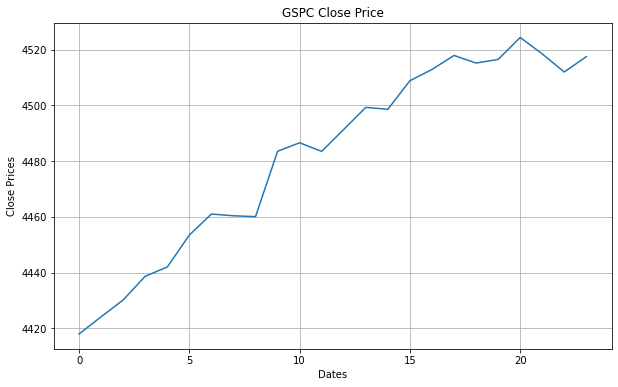

In [104]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
#plt.plot(testnoind3['y'])
plt.plot(GSPC_4_preds['yhat'])
plt.title('GSPC Close Price')
plt.show()

In [306]:
GSPC_4_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,week,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,4432.96582,4322.795008,4510.500974,4432.965820,4432.965820,-14.986993,-14.986993,-14.986993,-5.872434,...,-5.687636,-5.687636,-5.687636,-3.426923,-3.426923,-3.426923,0.0,0.0,0.0,4417.978827
1,2021-08-11,4436.09222,4325.836742,4520.850330,4436.092220,4436.092220,-11.958017,-11.958017,-11.958017,-1.574721,...,-6.907710,-6.907710,-6.907710,-3.475586,-3.475586,-3.475586,0.0,0.0,0.0,4424.134203
2,2021-08-12,4439.21862,4329.198654,4527.456673,4439.218620,4439.218620,-9.042784,-9.042784,-9.042784,1.602249,...,-7.467755,-7.467755,-7.467755,-3.177277,-3.177277,-3.177277,0.0,0.0,0.0,4430.175836
3,2021-08-13,4442.34502,4348.876707,4535.669790,4442.345020,4442.345020,-3.644980,-3.644980,-3.644980,5.456171,...,-6.553703,-6.553703,-6.553703,-2.547448,-2.547448,-2.547448,0.0,0.0,0.0,4438.700039
4,2021-08-16,4451.72422,4354.503890,4541.872285,4451.724220,4451.724220,-9.718713,-9.718713,-9.718713,-1.574721,...,-9.197468,-9.197468,-9.197468,1.053477,1.053477,1.053477,0.0,0.0,0.0,4442.005507
5,2021-08-17,4454.85062,4355.443808,4550.756396,4454.850620,4454.850620,-1.389370,-1.389370,-1.389370,1.602249,...,-5.687636,-5.687636,-5.687636,2.696017,2.696017,2.696017,0.0,0.0,0.0,4453.461250
6,2021-08-18,4457.97702,4365.388993,4556.356480,4457.977020,4457.977020,3.029670,3.029670,3.029670,5.456171,...,-6.907710,-6.907710,-6.907710,4.481209,4.481209,4.481209,0.0,0.0,0.0,4461.006690
7,2021-08-19,4461.10342,4350.384705,4561.052375,4461.103420,4461.103420,-0.723153,-0.723153,-0.723153,0.388737,...,-7.467755,-7.467755,-7.467755,6.355866,6.355866,6.355866,0.0,0.0,0.0,4460.380267
8,2021-08-20,4464.22982,4367.372476,4561.649784,4464.229820,4464.229820,-4.161561,-4.161561,-4.161561,-5.872434,...,-6.553703,-6.553703,-6.553703,8.264576,8.264576,8.264576,0.0,0.0,0.0,4460.068259
9,2021-08-23,4473.60902,4383.994633,4578.391583,4473.609020,4473.609020,9.895686,9.895686,9.895686,5.456171,...,-9.197468,-9.197468,-9.197468,13.636983,13.636983,13.636983,0.0,0.0,0.0,4483.504706


In [105]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['GOOG']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


GOOG
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [106]:
GOOG = pd.read_csv('GOOG_data.csv')

In [107]:
GOOG

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,789.750000,782.969971,785.000000,784.849976,975100,784.849976,GOOG
1,2016-08-12,783.395020,780.400024,781.500000,783.219971,740500,783.219971,GOOG
2,2016-08-15,787.489990,780.109985,783.750000,782.440002,938200,782.440002,GOOG
3,2016-08-16,780.979980,773.443970,780.299988,777.140015,1028000,777.140015,GOOG
4,2016-08-17,780.809998,773.530029,777.320007,779.909973,924200,779.909973,GOOG
...,...,...,...,...,...,...,...,...
1254,2021-08-05,2739.000000,2712.000000,2720.570068,2738.800049,593300,2738.800049,GOOG
1255,2021-08-06,2741.601074,2720.929932,2725.899902,2740.719971,678000,2740.719971,GOOG
1256,2021-08-09,2766.429932,2728.574951,2738.979980,2760.040039,618700,2760.040039,GOOG
1257,2021-08-10,2771.030029,2744.530029,2761.590088,2761.929932,801700,2761.929932,GOOG


In [108]:
GOOG_proph= GOOG
GOOG_proph['ds']=GOOG_proph['Date']
GOOG_proph['y']=GOOG_proph['Close']
GOOG_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [261]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(GOOG_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30f43f58b0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f3182786af0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30dc1d6a90>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30f4252e20>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


In [262]:
Model5 = proph(holidays_prior_scale = 0.1, seasonality_prior_scale= 0.1,changepoint_prior_scale= 0.5,seasonality_mode='multiplicative')
Model5.add_seasonality(name='week', period=5, fourier_order=4)
Model5.add_seasonality(name='monthly', period=31, fourier_order=1)

In [263]:
GOOG_train = GOOG_proph[:cutoff]
GOOG_test = GOOG_proph[cutoff:]

In [264]:
Model5.fit(GOOG_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [265]:
GOOG_train_preds=Model5.predict(GOOG_train)
GOOG_test_preds=Model5.predict(GOOG_test)
testnoind5=GOOG_test.reset_index()

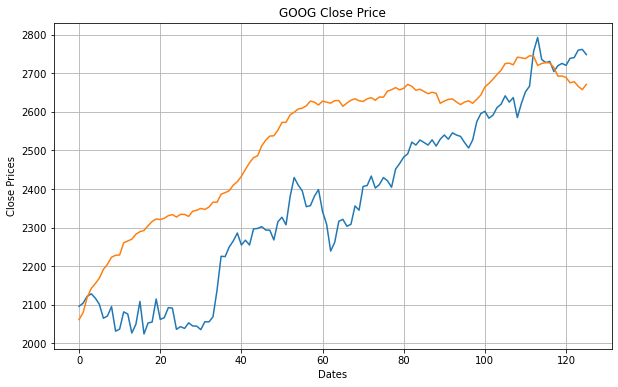

In [266]:
testnoind3=GSPC_test3.reset_index()
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind5['y'])
plt.plot(GOOG_test_preds['yhat'])
plt.title('GOOG Close Price')
plt.show()

In [267]:
Model5_fut = proph(holidays_prior_scale = 0.1, seasonality_prior_scale= 0.1,changepoint_prior_scale= 0.5,seasonality_mode='multiplicative')
Model5_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model5_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

In [268]:
Model5_fut.fit(GOOG_proph)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [269]:
GOOG_data_preds=Model5_fut.predict(GOOG_proph)
GOOG_fut_preds=Model5_fut.predict(future)
testnoind6=GOOG_proph.reset_index()

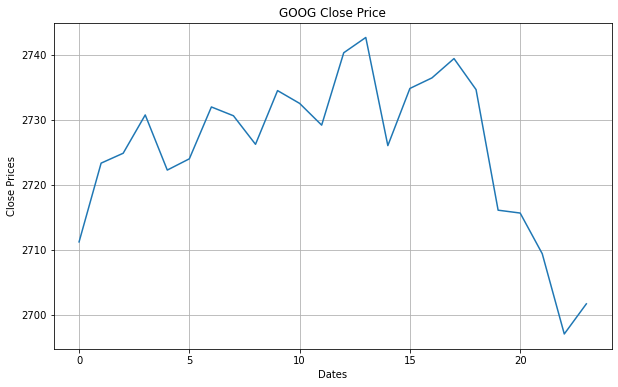

In [270]:

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
#plt.plot(testnoind3['y'])
plt.plot(GOOG_fut_preds['yhat'])
plt.title('GOOG Close Price')
plt.show()

In [307]:
GOOG_fut_preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,monthly,monthly_lower,monthly_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2021-08-10,2298.211967,2661.698532,2763.301047,2298.211967,2298.211967,0.001894,0.001894,0.001894,0.179695,...,0.123790,0.123790,0.123790,0.057179,0.057179,0.057179,0.0,0.0,0.0,2711.190035
1,2021-08-11,2301.001666,2671.329747,2776.945881,2301.001666,2301.001666,0.001969,0.001969,0.001969,0.183540,...,0.125231,0.125231,0.125231,0.055756,0.055756,0.055756,0.0,0.0,0.0,2723.326868
2,2021-08-12,2303.791364,2673.029984,2779.124163,2303.791364,2303.791364,0.001963,0.001963,0.001963,0.182768,...,0.125866,0.125866,0.125866,0.054476,0.054476,0.054476,0.0,0.0,0.0,2724.851535
3,2021-08-13,2306.581063,2677.534181,2782.295687,2306.581063,2306.581063,0.001876,0.001876,0.001876,0.183896,...,0.126725,0.126725,0.126725,0.053344,0.053344,0.053344,0.0,0.0,0.0,2730.751960
4,2021-08-16,2314.950160,2672.697880,2773.886405,2314.950160,2314.950160,0.001186,0.001186,0.001186,0.175946,...,0.123385,0.123385,0.123385,0.050792,0.050792,0.050792,0.0,0.0,0.0,2722.257298
5,2021-08-17,2317.739859,2674.792389,2774.464023,2317.739859,2317.739859,0.000843,0.000843,0.000843,0.175279,...,0.123790,0.123790,0.123790,0.050183,0.050183,0.050183,0.0,0.0,0.0,2723.991428
6,2021-08-18,2320.529558,2679.306109,2783.769276,2320.529558,2320.529558,0.000466,0.000466,0.000466,0.177310,...,0.125231,0.125231,0.125231,0.049663,0.049663,0.049663,0.0,0.0,0.0,2731.983424
7,2021-08-19,2323.319257,2680.455309,2785.177574,2323.319257,2323.319257,0.000070,0.000070,0.000070,0.175312,...,0.125866,0.125866,0.125866,0.049206,0.049206,0.049206,0.0,0.0,0.0,2730.624970
8,2021-08-20,2326.108955,2673.559489,2779.994286,2326.108955,2326.108955,-0.000329,-0.000329,-0.000329,0.172012,...,0.126725,0.126725,0.126725,0.048784,0.048784,0.048784,0.0,0.0,0.0,2726.226745
9,2021-08-23,2334.478052,2681.285719,2784.024217,2334.478052,2334.478052,-0.001383,-0.001383,-0.001383,0.171356,...,0.123385,0.123385,0.123385,0.047403,0.047403,0.047403,0.0,0.0,0.0,2734.503970


In [118]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['TSLA']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.


TSLA
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [119]:
TSLA = pd.read_csv('TSLA_data.csv')
TSLA

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,45.514000,44.681999,45.234001,44.981998,9404500.0,44.981998,TSLA
1,2016-08-12,45.330002,44.807999,45.082001,45.122002,9067500.0,45.122002,TSLA
2,2016-08-15,45.900002,44.986000,45.203999,45.118000,10171500.0,45.118000,TSLA
3,2016-08-16,45.438000,44.681999,45.098000,44.722000,11335500.0,44.722000,TSLA
4,2016-08-17,44.966000,44.560001,44.866001,44.647999,8935500.0,44.647999,TSLA
...,...,...,...,...,...,...,...,...
1254,2021-08-05,720.950012,711.409973,716.000000,714.630005,12919600.0,714.630005,TSLA
1255,2021-08-06,716.330017,697.630005,711.900024,699.099976,15576200.0,699.099976,TSLA
1256,2021-08-09,719.030029,705.130005,710.169983,713.760010,14715300.0,713.760010,TSLA
1257,2021-08-10,716.590027,701.880005,713.989990,709.989990,13253000.0,709.989990,TSLA


In [120]:
TSLA_proph= TSLA
TSLA_proph['ds']=TSLA_proph['Date']
TSLA_proph['y']=TSLA_proph['Close']
TSLA_proph.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)

In [121]:
Model6 = proph(holidays_prior_scale = 0.1)
Model6.add_seasonality(name='week', period=5, fourier_order=4)
Model6.add_seasonality(name='monthly', period=31, fourier_order=1)

In [122]:
TSLA_train = TSLA_proph[:cutoff]
TSLA_test = TSLA_proph[cutoff:]

In [123]:
Model6.fit(TSLA_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [124]:
TSLA_train_preds=Model6.predict(TSLA_train)
TSLA_test_preds=Model6.predict(TSLA_test)
testnoind7=TSLA_test.reset_index()

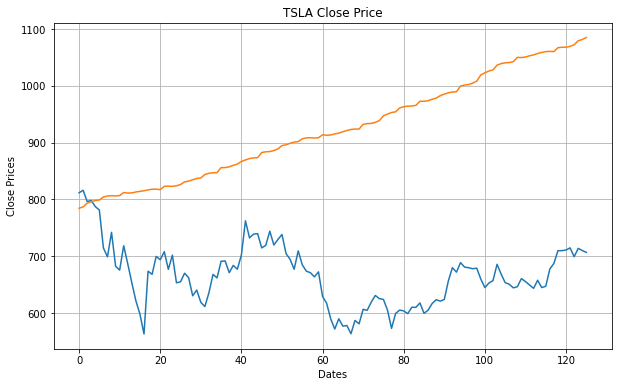

In [125]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot()
plt.plot(testnoind7['y'])
plt.plot(TSLA_test_preds['yhat'])
plt.title('TSLA Close Price')
plt.show()

In [126]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['IBM']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

IBM
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [151]:
IBM = pd.read_csv('IBM_data.csv')
IBM

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,164.949997,162.179993,162.250000,163.529999,8768600.0,130.565842,IBM
1,2016-08-12,163.460007,161.520004,163.190002,161.949997,2543100.0,129.304337,IBM
2,2016-08-15,162.970001,161.779999,162.399994,161.880005,2970400.0,129.248474,IBM
3,2016-08-16,161.929993,160.690002,161.110001,160.699997,2210200.0,128.306335,IBM
4,2016-08-17,161.160004,159.839996,160.970001,160.440002,3225900.0,128.098724,IBM
...,...,...,...,...,...,...,...,...
1254,2021-08-05,143.410004,142.220001,143.029999,142.770004,2757400.0,141.145035,IBM
1255,2021-08-06,144.389999,142.889999,143.000000,144.089996,3822600.0,142.449997,IBM
1256,2021-08-09,142.500000,140.970001,142.199997,141.250000,4904100.0,141.250000,IBM
1257,2021-08-10,141.809998,140.339996,141.210007,141.380005,5298800.0,141.380005,IBM


In [152]:
def Premodeling(df, trainsize=.9):
    df['ds']=df['Date']
    df['y']=df['Close']
    df.drop(columns=['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Name',], inplace=True)
    cutoff=round(df.shape[0]*trainsize)
    df_train =df[:cutoff]
    df_test = df[cutoff:]
    return df, df_train,df_test

In [153]:
IBM_proph, IBM_train, IBM_test =Premodeling(IBM)

In [156]:
IBM_proph

,ds,y
0,2016-08-11,163.529999
1,2016-08-12,161.949997
2,2016-08-15,161.880005
3,2016-08-16,160.699997
4,2016-08-17,160.440002
...,...,...
1254,2021-08-05,142.770004
1255,2021-08-06,144.089996
1256,2021-08-09,141.250000
1257,2021-08-10,141.380005


In [199]:
def Prophtest(Model,train, test):
    Model.fit(train)
    pred=Model.predict(test)
    testnoind=test.reset_index()
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    plt.plot()
    plt.plot(testnoind['y'])
    plt.plot(pred ['yhat'])
    plt.title('Close Price')
    plt.show()

In [162]:
Model7 = proph(holidays_prior_scale = 0.1)
Model7.add_seasonality(name='week', period=5, fourier_order=4)
Model7.add_seasonality(name='monthly', period=31, fourier_order=1)

In [163]:
Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


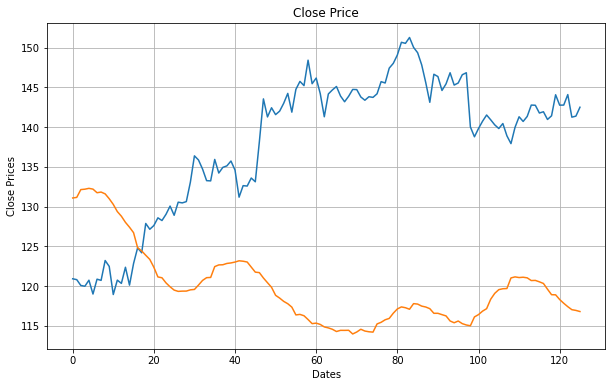

In [164]:
Prophtest(Model7,IBM_train, IBM_test)

In [166]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['^DJI']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

^DJI
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [175]:
DJI = pd.read_csv('^DJI_data.csv')
DJI

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,18638.339844,18519.080078,18519.080078,18613.519531,71470000,18613.519531,^DJI
1,2016-08-12,18606.060547,18535.859375,18595.650391,18576.470703,61580000,18576.470703,^DJI
2,2016-08-15,18722.609375,18559.929688,18588.589844,18636.050781,62350000,18636.050781,^DJI
3,2016-08-16,18614.859375,18550.650391,18614.480469,18552.019531,67570000,18552.019531,^DJI
4,2016-08-17,18582.349609,18468.679688,18537.089844,18573.939453,71000000,18573.939453,^DJI
...,...,...,...,...,...,...,...,...
1254,2021-08-05,35067.539062,34815.609375,34815.609375,35064.250000,216580000,35064.250000,^DJI
1255,2021-08-06,35246.789062,35077.441406,35077.441406,35208.511719,231570000,35208.511719,^DJI
1256,2021-08-09,35229.671875,35041.238281,35229.671875,35101.851562,207850000,35101.851562,^DJI
1257,2021-08-10,35285.160156,35091.910156,35135.171875,35264.671875,255040000,35264.671875,^DJI


In [176]:
DJI_proph, DJI_train, DJI_test =Premodeling(DJI)

In [271]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(DJI_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30dc1d2a30>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30dc13a460>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f319938a310>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31481c5a60>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [272]:
Model8 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model8.add_seasonality(name='week', period=5, fourier_order=4)
Model8.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


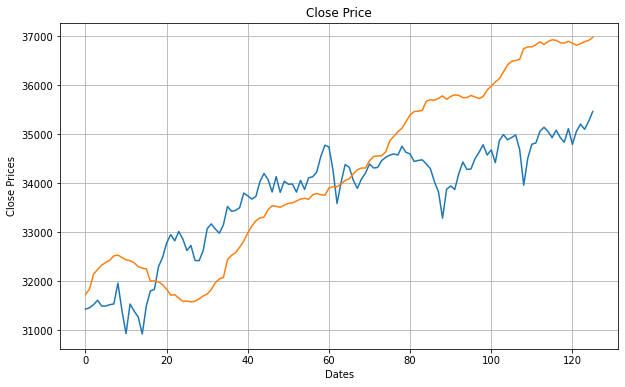

In [273]:
Prophtest(Model8,DJI_train, DJI_test)

In [274]:
Model8_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model8_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model8_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

In [275]:
def Prophfut(Model,train):
    Model.fit(train)
    pred=Model.predict(future)
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    plt.plot()
    plt.plot(pred['yhat'])
    plt.title('Future Close Price')
    plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


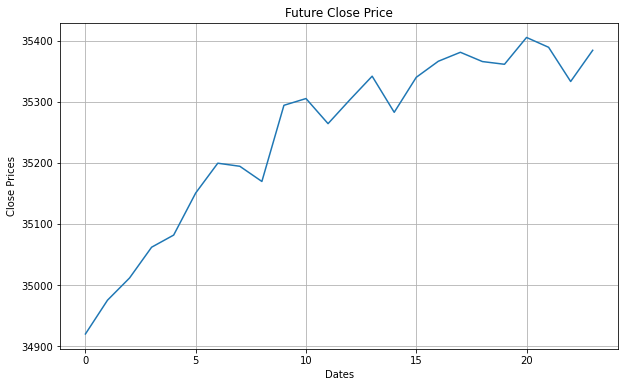

In [276]:
Prophfut(Model8_fut, DJI_proph)

In [309]:
DJI_fut=Model8_fut.predict(future)
DJI_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,35124.917775,34138.077564,35694.485572,35124.917775,35124.917775,-205.180914,-205.180914,-205.180914,-6.606405,...,104.046511,104.046511,104.046511,-256.644557,-256.644557,-256.644557,0.0,0.0,0.0,34919.736861
1,2021-08-11,35145.945181,34267.849680,35722.979862,35145.945181,35145.945181,-170.912053,-170.912053,-170.912053,2.796396,...,104.972873,104.972873,104.972873,-268.636476,-268.636476,-268.636476,0.0,0.0,0.0,34975.033128
2,2021-08-12,35166.972586,34291.481693,35824.322624,35166.972586,35166.972586,-155.558056,-155.558056,-155.558056,12.084712,...,97.049773,97.049773,97.049773,-277.544665,-277.544665,-277.544665,0.0,0.0,0.0,35011.414530
3,2021-08-13,35187.999992,34326.190085,35819.786401,35187.999992,35187.999992,-126.201125,-126.201125,-126.201125,20.878279,...,103.113742,103.113742,103.113742,-283.502301,-283.502301,-283.502301,0.0,0.0,0.0,35061.798866
4,2021-08-16,35251.082208,34319.125837,35829.473968,35251.082208,35251.082208,-169.420037,-169.420037,-169.420037,40.878661,...,85.802528,85.802528,85.802528,-286.056381,-286.056381,-286.056381,0.0,0.0,0.0,35081.662170
5,2021-08-17,35272.109613,34367.576812,35892.393702,35272.109613,35272.109613,-121.487236,-121.487236,-121.487236,44.507626,...,104.046511,104.046511,104.046511,-282.893497,-282.893497,-282.893497,0.0,0.0,0.0,35150.622377
6,2021-08-18,35293.137019,34419.365775,35931.585442,35293.137019,35293.137019,-93.787979,-93.787979,-93.787979,46.314443,...,104.972873,104.972873,104.972873,-278.384451,-278.384451,-278.384451,0.0,0.0,0.0,35199.349039
7,2021-08-19,35314.164424,34388.776011,35955.586902,35314.164424,35314.164424,-119.836522,-119.836522,-119.836522,46.225142,...,97.049773,97.049773,97.049773,-272.971467,-272.971467,-272.971467,0.0,0.0,0.0,35194.327902
8,2021-08-20,35335.191829,34386.652076,35926.068170,35335.191829,35335.191829,-165.729638,-165.729638,-165.729638,44.243378,...,103.113742,103.113742,103.113742,-267.110295,-267.110295,-267.110295,0.0,0.0,0.0,35169.462192
9,2021-08-23,35398.274046,34551.675141,36063.045951,35398.274046,35398.274046,-104.106404,-104.106404,-104.106404,28.119069,...,85.802528,85.802528,85.802528,-251.337156,-251.337156,-251.337156,0.0,0.0,0.0,35294.167642


In [193]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['FB']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

FB
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [206]:
FB = pd.read_csv('FB_data.csv')
FB

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,125.379997,124.750000,125.199997,124.900002,11729500,124.900002,FB
1,2016-08-12,125.000000,124.180000,124.699997,124.879997,12159000,124.879997,FB
2,2016-08-15,124.919998,123.699997,124.910004,123.900002,19295100,123.900002,FB
3,2016-08-16,123.919998,122.779999,123.500000,123.300003,14222400,123.300003,FB
4,2016-08-17,124.379997,122.849998,123.660004,124.370003,13794200,124.370003,FB
...,...,...,...,...,...,...,...,...
1254,2021-08-05,363.899994,356.899994,359.640015,362.970001,10247200,362.970001,FB
1255,2021-08-06,365.149994,361.399994,361.399994,363.510010,8918100,363.510010,FB
1256,2021-08-09,365.779999,360.750000,363.760010,361.609985,7798900,361.609985,FB
1257,2021-08-10,364.100006,359.040009,361.829987,361.130005,7466900,361.130005,FB


In [207]:
FB_proph, FB_train, FB_test = Premodeling(FB)

In [277]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(FB_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31995b5400>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30f43ab100>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31826f6bb0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f314f3832e0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [278]:
Model9 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model9.add_seasonality(name='week', period=5, fourier_order=4)
Model9.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


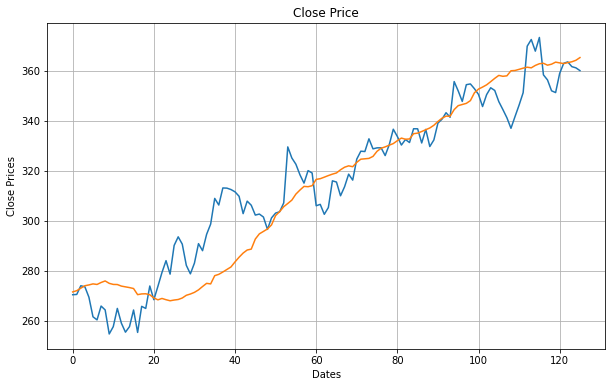

In [279]:
Prophtest(Model9,FB_train, FB_test)

In [282]:
Model9_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 10.0, holidays_prior_scale= 0.1, seasonality_mode= 'additive')
Model9_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model9_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


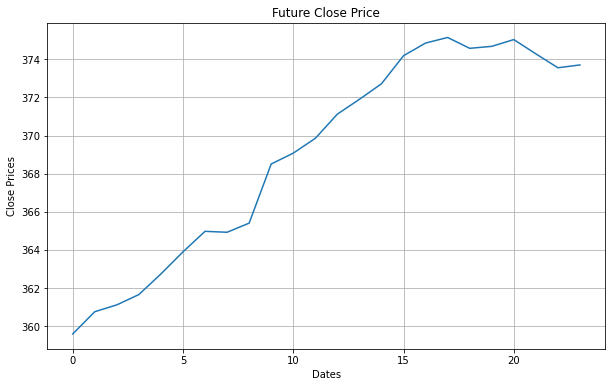

In [283]:
Prophfut(Model9_fut,FB_proph)

In [310]:
fb_fut=Model9_fut.predict(future)
fb_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,346.563404,349.591093,368.811583,346.563404,346.563404,13.027421,13.027421,13.027421,0.115052,...,-2.564696,-2.564696,-2.564696,15.976292,15.976292,15.976292,0.0,0.0,0.0,359.590825
1,2021-08-11,346.847186,351.111135,370.197926,346.847186,346.847186,13.911400,13.911400,13.911400,-0.050497,...,-2.378258,-2.378258,-2.378258,16.215438,16.215438,16.215438,0.0,0.0,0.0,360.758586
2,2021-08-12,347.130967,351.401845,371.450033,347.130967,347.130967,13.985866,13.985866,13.985866,-0.213979,...,-2.530730,-2.530730,-2.530730,16.498817,16.498817,16.498817,0.0,0.0,0.0,361.116833
3,2021-08-13,347.414749,352.853361,371.302093,347.414749,347.414749,14.242896,14.242896,14.242896,-0.368701,...,-2.614396,-2.614396,-2.614396,16.824000,16.824000,16.824000,0.0,0.0,0.0,361.657644
4,2021-08-16,348.266093,352.960882,373.009347,348.266093,348.266093,14.471240,14.471240,14.471240,-0.720285,...,-2.946210,-2.946210,-2.946210,18.013018,18.013018,18.013018,0.0,0.0,0.0,362.737333
5,2021-08-17,348.549874,354.545457,373.979919,348.549874,348.549874,15.347252,15.347252,15.347252,-0.783937,...,-2.564696,-2.564696,-2.564696,18.464128,18.464128,18.464128,0.0,0.0,0.0,363.897127
6,2021-08-18,348.833656,355.933293,374.907939,348.833656,348.833656,16.140981,16.140981,16.140981,-0.815495,...,-2.378258,-2.378258,-2.378258,18.932741,18.932741,18.932741,0.0,0.0,0.0,364.974637
7,2021-08-19,349.117437,355.232894,374.898018,349.117437,349.117437,15.808488,15.808488,15.808488,-0.813666,...,-2.530730,-2.530730,-2.530730,19.412123,19.412123,19.412123,0.0,0.0,0.0,364.925925
8,2021-08-20,349.401219,355.564672,375.809501,349.401219,349.401219,16.003013,16.003013,16.003013,-0.778526,...,-2.614396,-2.614396,-2.614396,19.895163,19.895163,19.895163,0.0,0.0,0.0,365.404231
9,2021-08-23,350.252563,358.230054,378.780210,350.252563,350.252563,18.253869,18.253869,18.253869,-0.494034,...,-2.946210,-2.946210,-2.946210,21.292120,21.292120,21.292120,0.0,0.0,0.0,368.506432


In [284]:
def download_stock(stock):
	""" try to query the iex for a stock, if failed note with print """
	try:
		print(stock)
		stock_df = web.DataReader(stock,'yahoo', start_time, now_time)
		stock_df['Name'] = stock
		output_name = stock + '_data.csv'
		stock_df.to_csv(output_name)
	except:
		bad_names.append(stock)
		print('bad: %s' % (stock))

if __name__ == '__main__':

	""" set the download window """
	now_time = datetime.now()
	start_time = datetime(now_time.year - 5, now_time.month , now_time.day)

	""" list of s_anp_p companies """
	s_and_p = ['RF']
		
	bad_names =[] #to keep track of failed queries

	"""here we use the concurrent.futures module's ThreadPoolExecutor
		to speed up the downloads buy doing them in parallel 
		as opposed to sequentially """

	#set the maximum thread number
	max_workers = 50

	workers = min(max_workers, len(s_and_p)) #in case a smaller number of stocks than threads was passed in
	with futures.ThreadPoolExecutor(workers) as executor:
		res = executor.map(download_stock, s_and_p)

	
	""" Save failed queries to a text file to retry """
	if len(bad_names) > 0:
		with open('failed_queries.txt','w') as outfile:
			for name in bad_names:
				outfile.write(name+'\n')

	#timing:
	finish_time = datetime.now()
	duration = finish_time - now_time
	minutes, seconds = divmod(duration.seconds, 60)
	print('getSandP_threaded.py')
	print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
	#The threaded script took 0 minutes and 31 seconds to run.

RF
getSandP_threaded.py
The threaded script took 0 minutes and 0 seconds to run.


In [314]:
RF = pd.read_csv('RF_data.csv')
RF

,Date,High,Low,Open,Close,Volume,Adj Close,Name
0,2016-08-11,9.340000,9.220000,9.260000,9.300000,11666400.0,7.946636,RF
1,2016-08-12,9.230000,9.140000,9.210000,9.230000,9984200.0,7.886822,RF
2,2016-08-15,9.580000,9.280000,9.290000,9.560000,18672200.0,8.168802,RF
3,2016-08-16,9.620000,9.450000,9.500000,9.540000,17488000.0,8.151712,RF
4,2016-08-17,9.580000,9.490000,9.530000,9.550000,16724800.0,8.160257,RF
...,...,...,...,...,...,...,...,...
1254,2021-08-05,19.610001,19.389999,19.459999,19.540001,5295100.0,19.540001,RF
1255,2021-08-06,20.180000,19.780001,19.860001,19.959999,5424900.0,19.959999,RF
1256,2021-08-09,20.170000,19.629999,19.830000,19.889999,4779500.0,19.889999,RF
1257,2021-08-10,20.250000,19.770000,19.809999,20.190001,6795500.0,20.190001,RF


In [315]:
RF_proph, RF_train, RF_test = Premodeling(RF, trainsize=.90)

In [288]:
cutoffs=pd.to_datetime(['2020-08-05', '2021-02-05', '2021-02-05'])
param_grid = { 'changepoint_prior_scale':[0.001, 0.01, 0.1, 0.5],
             'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
             'holidays_prior_scale': [.1,1,5,10],
             'seasonality_mode': ['additive','multiplicative']}
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  
for params in all_params:
    m = proph(**params).fit(RF_proph)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='120 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
best_params = all_params[np.argmin(rmses)]
print(best_params)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30f43db220>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31140529d0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f30f41e1fa0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f31140cae50>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Applying in parallel with <concurre

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative'}


In [316]:
Model10 = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'multiplicative')
Model10.add_seasonality(name='week', period=5, fourier_order=4)
Model10.add_seasonality(name='monthly', period=31, fourier_order=1)

In [317]:
Model10_fut = proph(changepoint_prior_scale= 0.5, seasonality_prior_scale= 1.0, holidays_prior_scale= 0.1, seasonality_mode= 'multiplicative')
Model10_fut.add_seasonality(name='week', period=5, fourier_order=4)
Model10_fut.add_seasonality(name='monthly', period=31, fourier_order=1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


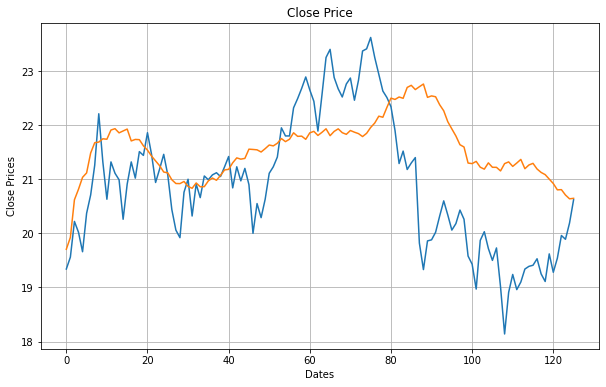

In [318]:
Prophtest(Model10,RF_train, RF_test)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


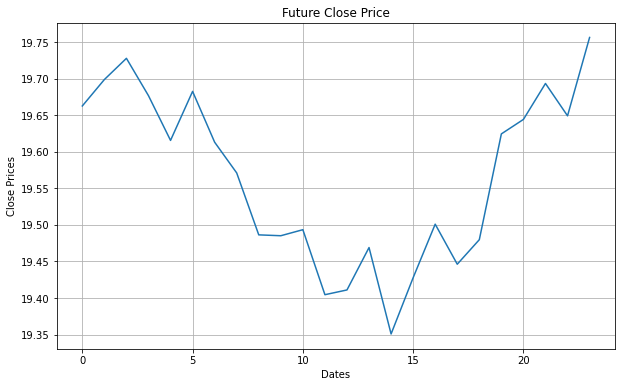

In [319]:
Prophfut(Model10_fut,RF_proph)

In [311]:
reg_fut=Model10_fut.predict(future)
reg_fut

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-10,22.593393,20.548946,22.726564,22.593393,22.593393,-1.002452,-1.002452,-1.002452,0.016516,...,0.312466,0.312466,0.312466,-1.267463,-1.267463,-1.267463,0.0,0.0,0.0,21.590941
1,2021-08-11,22.622054,20.498999,22.796097,22.622054,22.622054,-0.945360,-0.945360,-0.945360,0.026374,...,0.294105,0.294105,0.294105,-1.263839,-1.263839,-1.263839,0.0,0.0,0.0,21.676694
2,2021-08-12,22.650715,20.673282,22.944129,22.650715,22.650715,-0.882569,-0.882569,-0.882569,0.035153,...,0.292011,0.292011,0.292011,-1.259949,-1.259949,-1.259949,0.0,0.0,0.0,21.768146
3,2021-08-13,22.679376,20.622582,22.927874,22.679376,22.679376,-0.901171,-0.901171,-0.901171,0.042492,...,0.293180,0.293180,0.293180,-1.255878,-1.255878,-1.255878,0.0,0.0,0.0,21.778205
4,2021-08-16,22.765359,20.646685,22.970064,22.765359,22.765359,-0.898601,-0.898601,-0.898601,0.053235,...,0.293840,0.293840,0.293840,-1.243676,-1.243676,-1.243676,0.0,0.0,0.0,21.866757
5,2021-08-17,22.794020,20.819755,23.144020,22.794020,22.794020,-0.824774,-0.824774,-0.824774,0.052569,...,0.312466,0.312466,0.312466,-1.240026,-1.240026,-1.240026,0.0,0.0,0.0,21.969245
6,2021-08-18,22.822680,20.821651,23.095895,22.822680,22.822680,-0.873907,-0.873907,-0.873907,0.049750,...,0.294105,0.294105,0.294105,-1.236799,-1.236799,-1.236799,0.0,0.0,0.0,21.948773
7,2021-08-19,22.851341,20.797566,23.044236,22.851341,22.851341,-0.900491,-0.900491,-0.900491,0.044895,...,0.292011,0.292011,0.292011,-1.234117,-1.234117,-1.234117,0.0,0.0,0.0,21.950850
8,2021-08-20,22.880002,20.747163,23.037235,22.880002,22.880002,-0.964681,-0.964681,-0.964681,0.038202,...,0.293180,0.293180,0.293180,-1.232091,-1.232091,-1.232091,0.0,0.0,0.0,21.915322
9,2021-08-23,22.965985,20.813308,23.241178,22.965985,22.965985,-0.907767,-0.907767,-0.907767,0.010141,...,0.293840,0.293840,0.293840,-1.230783,-1.230783,-1.230783,0.0,0.0,0.0,22.058219
